# Movie Recommender System

### Initialization


#### Import Libraries


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#### Import Dataset

In [25]:
df = pd.read_csv('mymoviedb.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#### Information

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


#### Missing Values

In [27]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

#### Description

In [28]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [29]:
df.duplicated().sum()

0

### Exploratory Data Analysis

#### Yearwise Analysis

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_7784\4036614677.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].axhline(y = average[1], linestyle = '--',label='Average',c='black')
C:\Users\Rishabh\AppData\Local\Temp\ipykernel_7784\4036614677.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].axhline(y = average[2], linestyle = '--',label='Average',c='black')
C:\Users\Rishabh\AppData\Local\Temp\ipykernel_7784\4036614677.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior

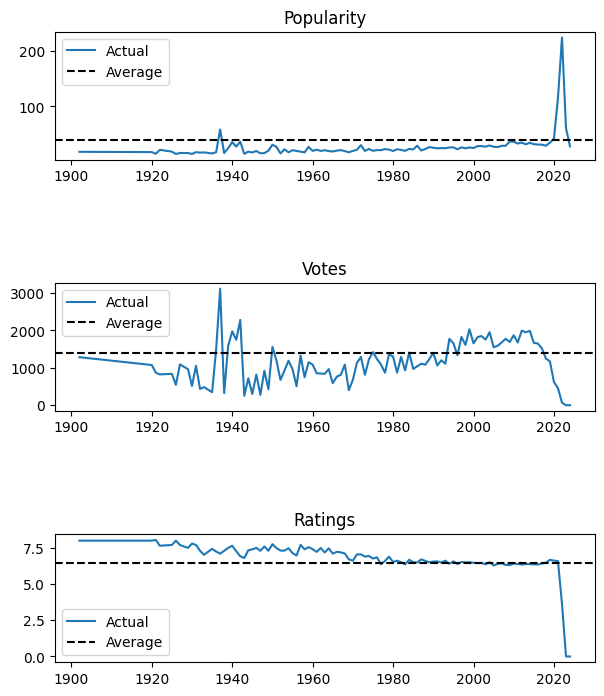

In [30]:
df['Year'] = [int(x[0:4]) for x in df['Release_Date']]
yearwise = df[['Year','Popularity','Vote_Count','Vote_Average']].groupby(['Year']).mean()
average = df[['Year','Popularity','Vote_Count','Vote_Average']].mean()

fig,ax = plt.subplots(3,1)
ax[0].plot(yearwise.index,yearwise['Popularity'],label='Actual')
ax[0].axhline(y = average[1], linestyle = '--',label='Average',c='black')
ax[0].set_title('Popularity')
ax[0].legend(loc='best')

ax[1].plot(yearwise.index,yearwise['Vote_Count'],label='Actual')
ax[1].axhline(y = average[2], linestyle = '--',label='Average',c='black')
ax[1].set_title('Votes')
ax[1].legend(loc='best')

ax[2].plot(yearwise.index,yearwise['Vote_Average'],label='Actual')
ax[2].axhline(y = average[3], linestyle = '--',label='Average',c='black')
ax[2].set_title('Ratings')
ax[2].legend(loc='best')

fig.tight_layout(pad=2.0)
fig.set_figheight(8)
plt.show()
# average

#### Genre-Wise Split

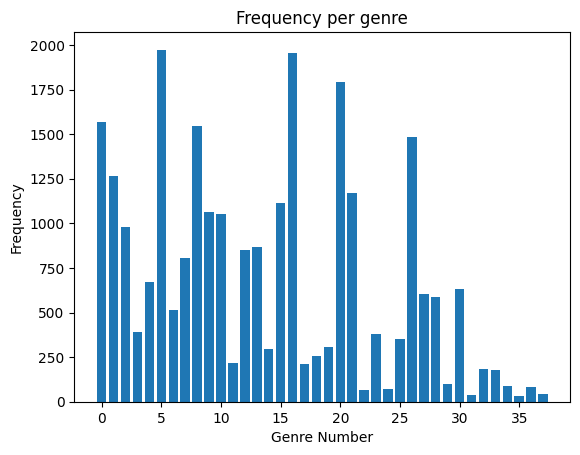

Maximum Genre and Value:  Thriller | 1973
Minimum Genre and Value:  Documentary | 31


In [31]:
genre_values = {}
value_dict = {}
def genre_fill(row):
    for genre in row.split(','):
        if genre in genre_values.keys():
            genre_values[genre]+=1
        else:
            genre_values[genre]=1

for row in df['Genre']:
    genre_fill(row)
    
plt.bar(np.arange(len(genre_values.keys())),genre_values.values())
plt.title('Frequency per genre')
plt.xlabel('Genre Number')
plt.ylabel('Frequency')
plt.show()

max_key = max(genre_values, key=genre_values.get)
min_key = min(genre_values, key=genre_values.get)
print(f"Maximum Genre and Value: {max_key} | {max(genre_values.values())}")
print(f"Minimum Genre and Value: {min_key} | {min(genre_values.values())}")

#### Heatmap

<Axes: >

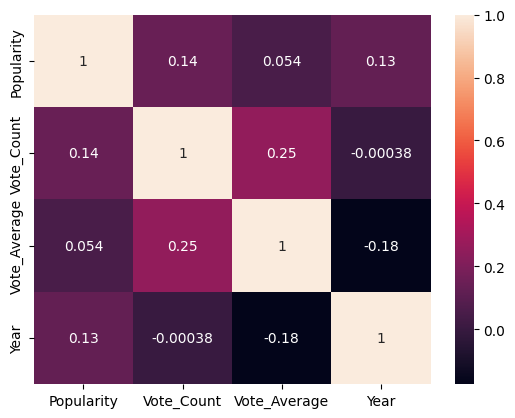

In [32]:
cols = df.describe().columns
sb.heatmap(df[cols].corr(),annot=True)

#### Pairplots

C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When gro

[]

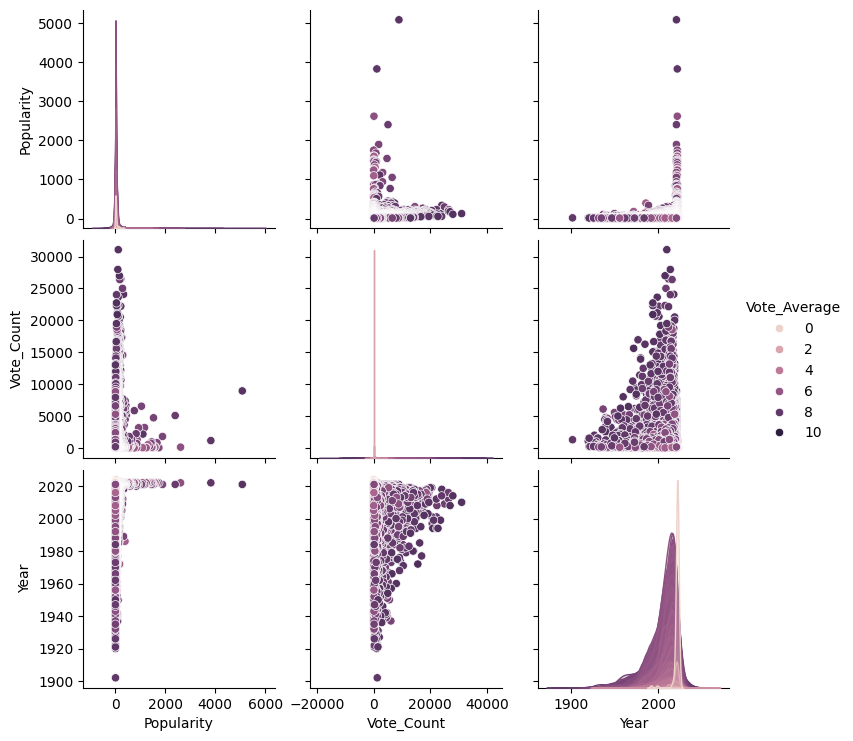

In [33]:
sb.pairplot(df,hue='Vote_Average')
plt.plot()

### Preprocessing

#### Lowercasing

In [34]:
def lower(text):
    return text.lower()

df['Title_Lower'] = df['Title'].apply(lower)

#### Porter Stemming

In [35]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stem = PorterStemmer()
def stem_sentence(text):
    y = []
    for word in text.split(" "):
        y.append(stem.stem(word))
    return " ".join(val for val in y)   

df['Overview_Stemmed'] = df['Overview'].apply(stem_sentence)

### Fuzzy Matching Mispell Handling

In [36]:
from thefuzz import fuzz,process

def match_fuzzy(title):
    return process.extract(title.lower(),df['Title_Lower'],scorer=fuzz.token_sort_ratio)[0][0]

match_fuzzy("Spiderman far from home")

'spider-man: far from home'

### Fuzzy Fetch Function

In [40]:
from thefuzz import fuzz
def fuzzy_fetch(movie):
    overview_score=[]
    title_score=[]
    genre_score=[]
    try:
        index = df[df['Title_Lower']==movie.lower()].iloc[0]
    except:
        index = df[df['Title_Lower']==match_fuzzy(movie.lower())].iloc[0]
    for row in df['Overview_Stemmed']:
        overview_score.append(fuzz.token_set_ratio(row,index['Overview_Stemmed']))
    for row in df['Title_Lower']:
        title_score.append(fuzz.token_set_ratio(row,index['Title_Lower']))
    for row in df['Genre']:
        genre_score.append(fuzz.partial_ratio(row,index['Genre']))
    df['Score']=[genre_score[i]*1.25 + overview_score[i]*1.5 + title_score[i]*2 for i in range(len(title_score))]
    return df.sort_values(by='Score',ascending=False).drop(['Overview_Stemmed','Title_Lower'],axis=1)[1:10].sort_values(by='Popularity',ascending=False)[0:6]

fuzzy_fetch('Avengers')

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year,Score
171,2019-04-24,Avengers: Endgame,After the devastating events of Avengers: Infi...,205.308,20521,8.3,en,"Adventure, Science Fiction, Action",https://image.tmdb.org/t/p/original/or06FN3Dka...,2019,334.75
254,2015-04-22,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,163.611,19473,7.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/4ssDuvEDkS...,2015,329.25
1169,2014-03-25,Avengers Confidential: Black Widow & Punisher,When the Punisher takes out a black-market wea...,59.230,178,6.4,ja,"Animation, Science Fiction, Action",https://image.tmdb.org/t/p/original/hRBXP91ATK...,2014,328.75
3295,2006-02-21,Ultimate Avengers: The Movie,When a nuclear missile was fired at Washington...,28.180,267,6.8,en,"Action, Animation, Family, Adventure, Science ...",https://image.tmdb.org/t/p/original/vd7GyPkDvD...,2006,357.75
3748,2006-08-08,Ultimate Avengers 2,Mysterious Wakanda lies in the darkest heart o...,25.652,224,6.8,en,"Adventure, Animation, Action, Science Fiction",https://image.tmdb.org/t/p/original/bsDLG069v8...,2006,322.25
4274,1998-08-13,The Avengers,"British Ministry agent John Steed, under direc...",23.391,548,4.4,en,"Thriller, Science Fiction",https://image.tmdb.org/t/p/original/1p5thyQ4pC...,1998,373.25


### Pickling

In [ ]:
import pickle

f = open('dataframe.pkl','wb')
pickle.dump(df,f)
f.close()